### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.



# Hypothestis Generation
Hypotheses for analyzing the BigMart Outlet Sales dataset:

1.Location of the store affects sales.

2.Product placement affects sales.

3.Store size affects the sales.



# Feature Description

1.Item_Identifier: A unique product ID assigned to each item in the store.

2.Item_Weight: The weight of the product in grams.

3.Item_Fat_Content: Whether the product is labeled as "Low Fat" or "Regular".

4.Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product.

5.Item_Type: The category to which the product belongs (e.g., dairy, meats, household, etc.).

6.Item_MRP: The maximum retail price of the product.

7.Outlet_Identifier: A unique store ID assigned to each outlet.

8.Outlet_Establishment_Year: The year in which the outlet was established.

9.Outlet_Size: The size of the outlet in terms of ground area covered.

10.Outlet_Location_Type: The type of city in which the outlet is located (Tier 1, 2, or 3)
.
11.Outlet_Type: Whether the outlet is a grocery store or a supermarket.

12.Item_Outlet_Sales: The sales of the product in the particular outlet.

### Importing Libraries that are useful for data manipulation and visualization etc

In [180]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Loading Data(Train data, Test data)

In [181]:
import os
print(os.listdir("H:\TechnoDataSet"))

['Test.csv', 'Train.csv']


In [182]:
train = pd.read_csv('H:\TechnoDataSet/Train.csv')
test = pd.read_csv('H:\TechnoDataSet/Test.csv')

In [183]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [184]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [185]:
test.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [186]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


### Exploratory Data Analysis

In [187]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [188]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3417026357.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

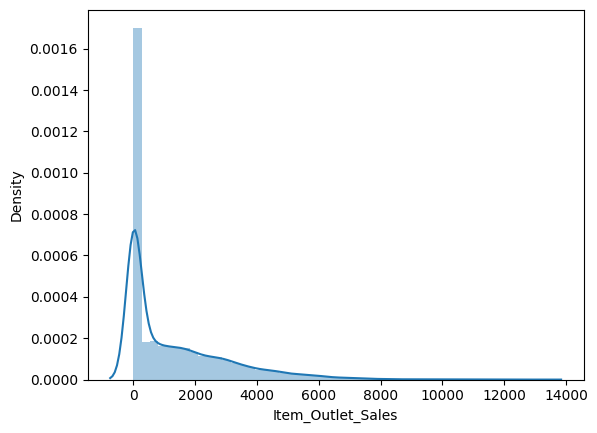

In [189]:
sns.distplot(data['Item_Outlet_Sales'])

In [190]:
print('Skewness: %f' %data['Item_Outlet_Sales'].skew())

Skewness: 1.544684


In [191]:
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Kurtsis: 2.419439


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [193]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [194]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [195]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [196]:
categorial_features = data.select_dtypes(include=[object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [197]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [198]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548


In [199]:
data.isnull().sum()        #to check missing value

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [200]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Missing Value Handling

In [201]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

In [202]:
# Checking for the missing values and its precentage
values=data.isnull().sum()
percentage=100*data.isnull().sum()/len(data)
table=pd.concat([values,percentage.round(2)],axis=1)
table.columns=['No of missing values','percentage of missing values']
table[table['No of missing values']!=0].sort_values('percentage of missing values',ascending=False)

,No of missing values,percentage of missing values


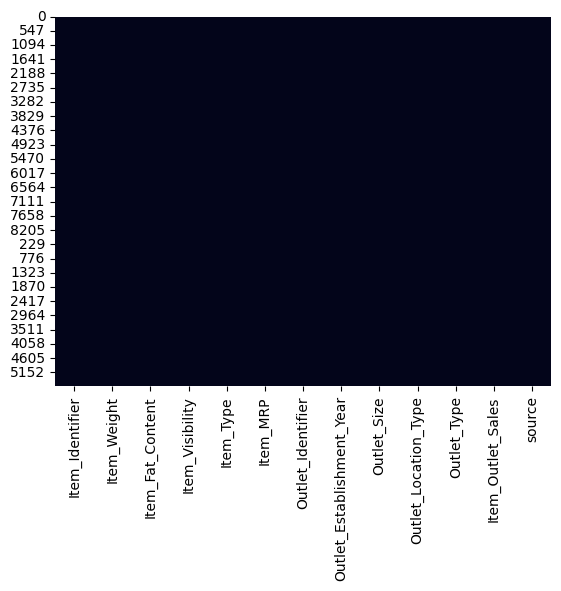

In [203]:
# Check the missing values with heatmap :

sns.heatmap(data.isnull(), cbar=False)
plt.show()

### Outlier Handling

<Axes: >

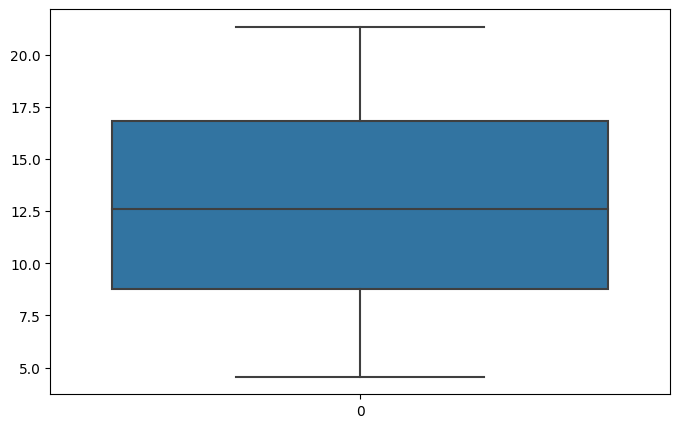

In [204]:
plt.figure(figsize=(8,5))
sns.boxplot(train["Item_Weight"])


<Axes: >

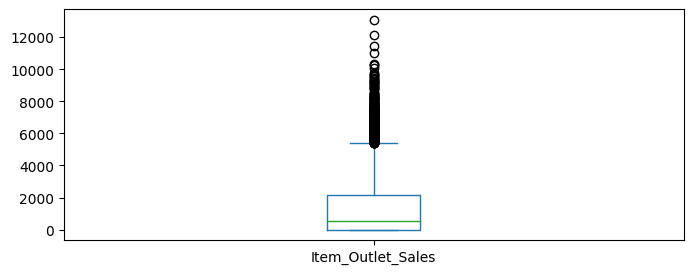

In [205]:
plt.figure(figsize=(8,3))
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data["Item_Outlet_Sales"].plot(kind="box")

<Axes: >

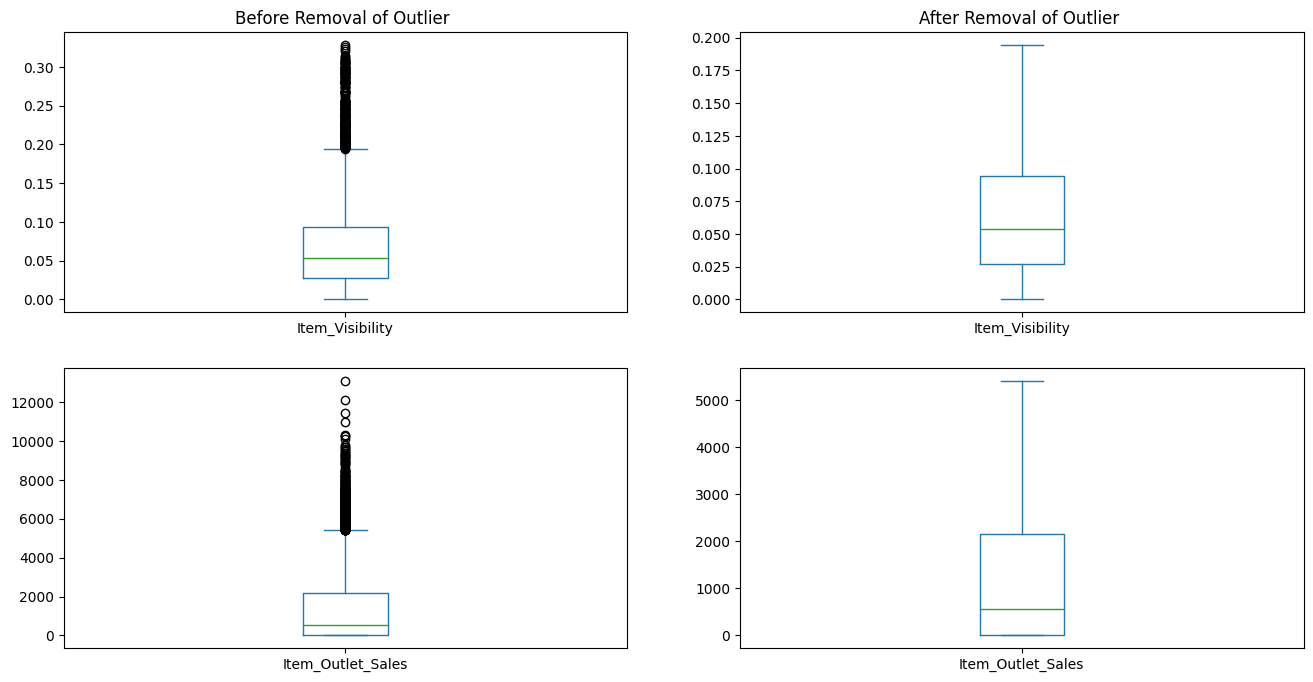

In [206]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.title("Before Removal of Outlier ")
data['Item_Visibility'].plot(kind='box')

plt.subplot(2,2,2)
plt.title("After Removal of Outlier ")
new_data['Item_Visibility'].plot(kind='box')

plt.subplot(2,2,3)
data['Item_Outlet_Sales'].plot(kind='box')

plt.subplot(2,2,4)
new_data['Item_Outlet_Sales'].plot(kind='box')

In [207]:
#Outliers are present so here we do imputation using median
data["Item_Outlet_Sales"]=data["Item_Outlet_Sales"].fillna(data["Item_Outlet_Sales"].median())

In [208]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

# Bivariate Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3180865595.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

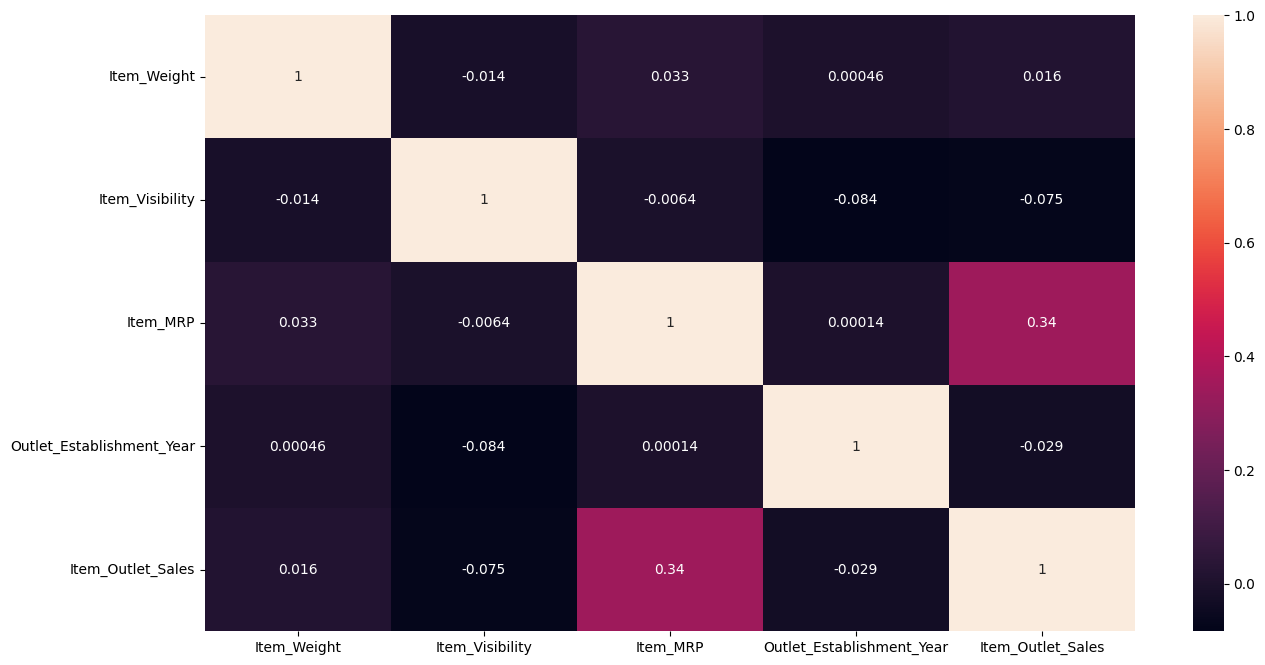

In [209]:
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

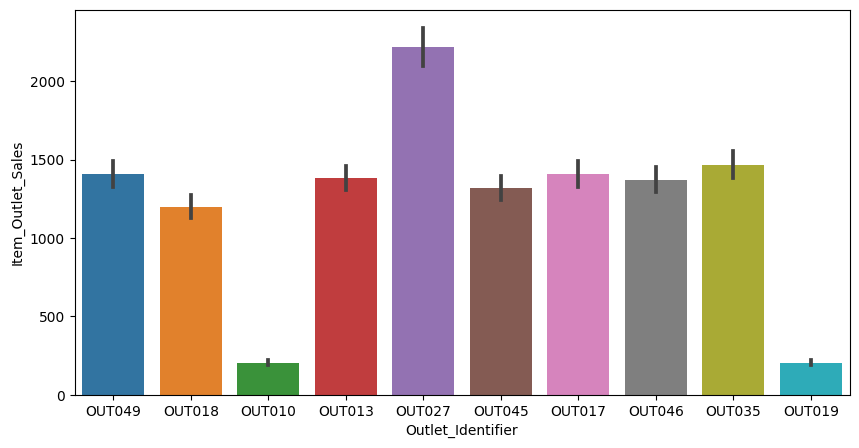

In [210]:
#understanding outlet_identifier depending on item_outlet_sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "Outlet_Identifier", y= "Item_Outlet_Sales")

Text(0, 0.5, 'Mean of Item outlet sales')

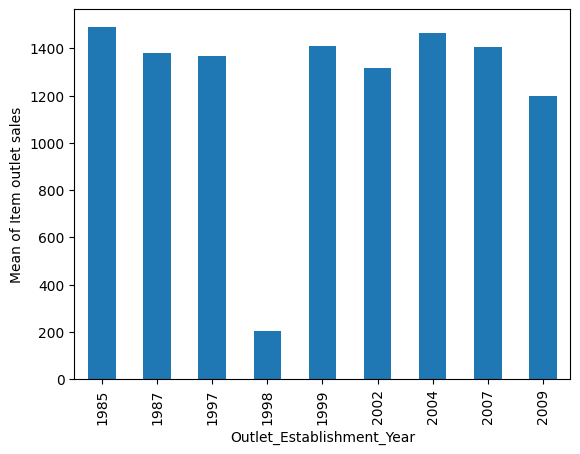

In [211]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
data.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

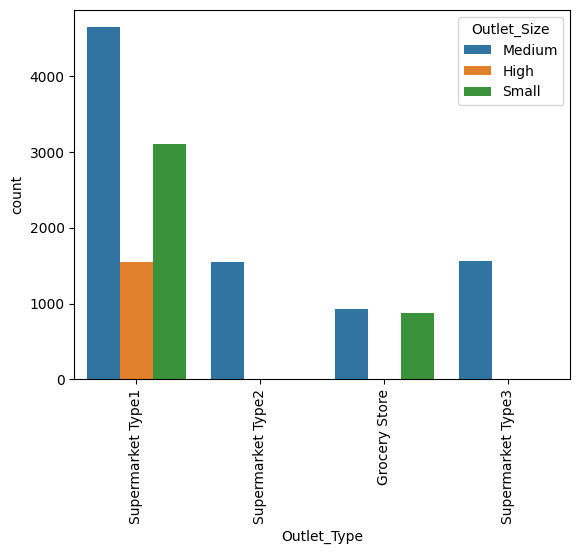

In [212]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = data, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

In [213]:
# IQR based outlier filtering
#for attribute Item_Visibility
percentile25_IV=data['Item_Visibility'].quantile(0.25)
percentile75_IV=data['Item_Visibility'].quantile(0.75)

#inter quartile range for Item_Visibility
IQR1=percentile75_IV-percentile25_IV

lower_lim_IV=percentile25_IV-1.5*IQR1
upper_lim_IV=percentile75_IV+1.5*IQR1

new_data=data.copy()

new_data['Item_Visibility']=np.where(
    new_data['Item_Visibility']>upper_lim_IV,
    upper_lim_IV,
    np.where(
        new_data['Item_Visibility']<lower_lim_IV,
        lower_lim_IV,
        new_data['Item_Visibility']
    )
)

#for attribute Item_Outlet_Sales
percentile25_IOS=data['Item_Outlet_Sales'].quantile(0.25)
percentile75_IOS=data['Item_Outlet_Sales'].quantile(0.75)

#inter quartile range for Item_Outlet_Sales
IQR2=percentile75_IOS-percentile25_IOS

lower_lim_IOS=percentile25_IOS-1.5*IQR2
upper_lim_IOS=percentile75_IOS+1.5*IQR2

new_data['Item_Outlet_Sales']=np.where(
    new_data['Item_Outlet_Sales']>upper_lim_IOS,
    upper_lim_IOS,
    np.where(
        new_data['Item_Outlet_Sales']<lower_lim_IOS,
        lower_lim_IOS,
        new_data['Item_Outlet_Sales']
    )
)

In [214]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


# Skewness and Kurtosis of numerical attributes

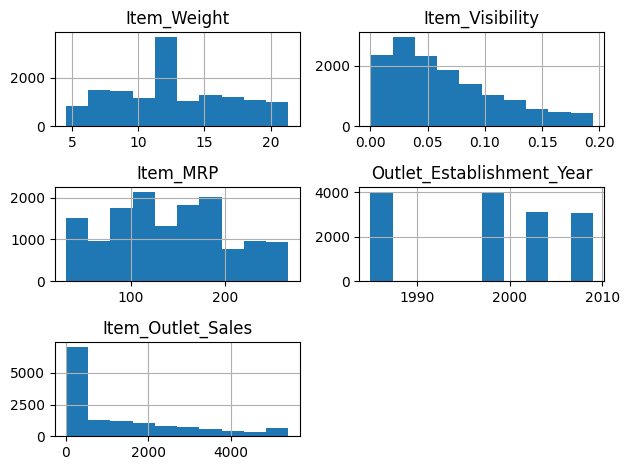

Skewness :
 Item_Weight                  0.111314
Item_Visibility              0.815193
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.162057
dtype: float64
---------------------------------
Kurtosis :
 Item_Weight                 -0.860626
Item_Visibility             -0.065348
Item_MRP                    -0.893856
Outlet_Establishment_Year   -1.205867
Item_Outlet_Sales            0.295774
dtype: float64


<Figure size 640x480 with 0 Axes>

In [215]:
 #Check the distribution of the all numerical columns and print skewness of the data :

new_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].hist()
plt.tight_layout()
plt.title("Distribution of Data")
plt.show()
plt.savefig('Distribution of data.png')
# Print the skewness of the data :
print('Skewness :\n', new_data[['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].skew())
print("---------------------------------")
print('Kurtosis :\n', new_data[['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].kurt())


# Univariate Analysis


### Categorical Variable

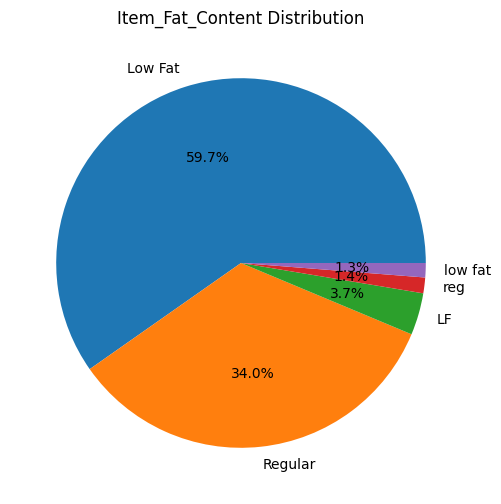

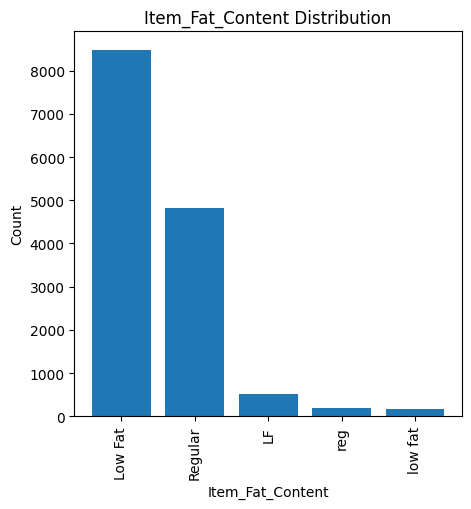

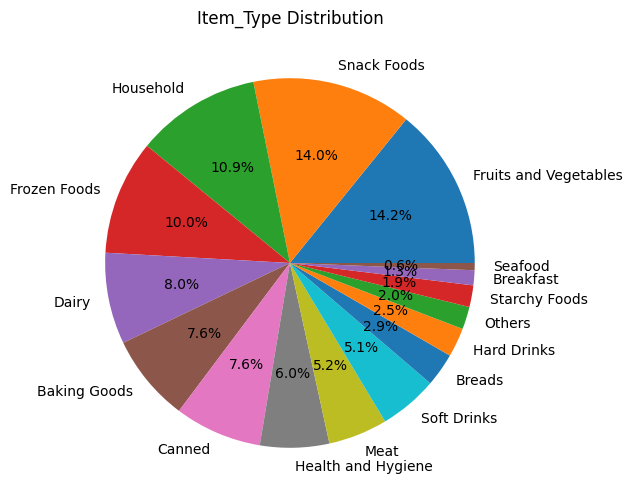

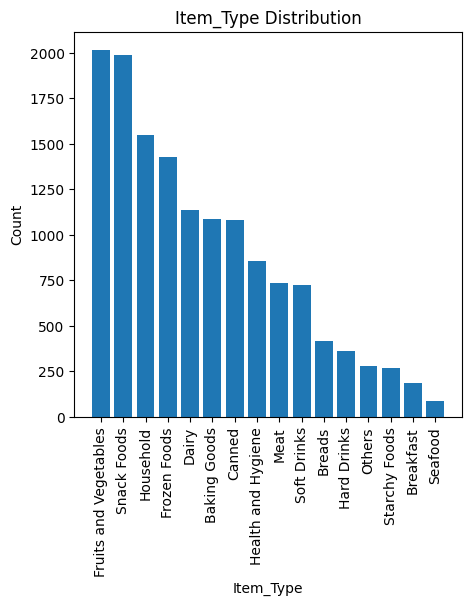

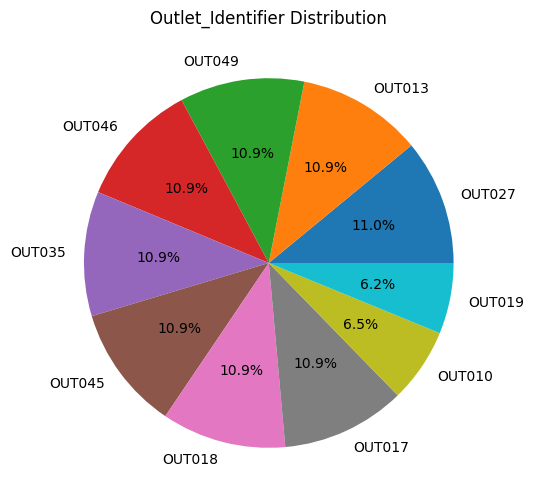

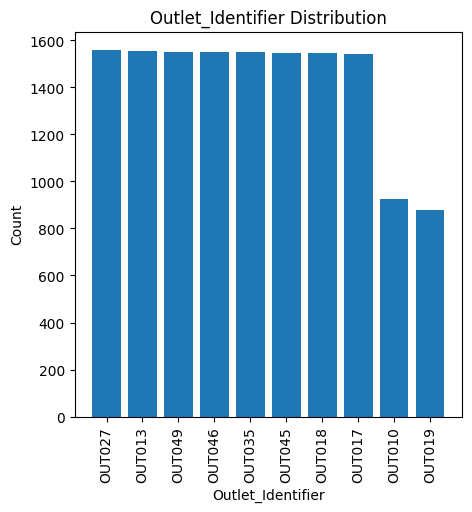

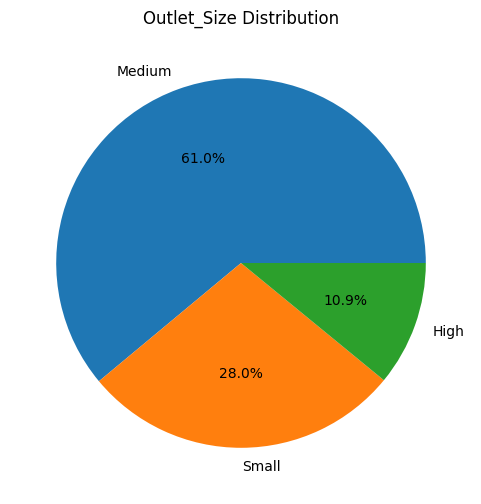

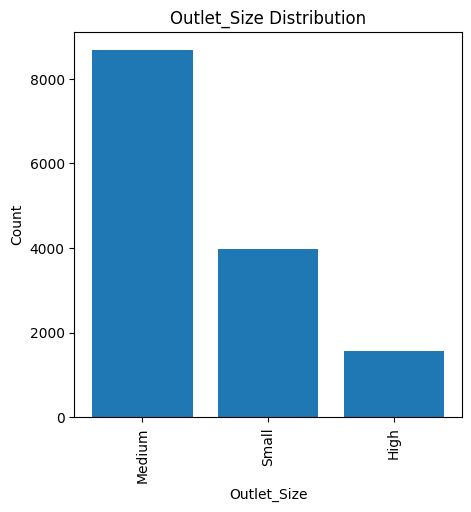

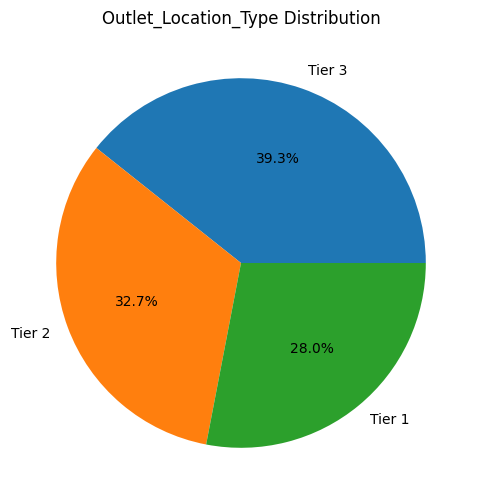

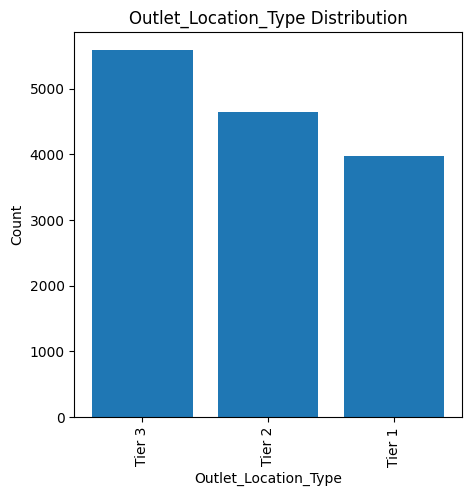

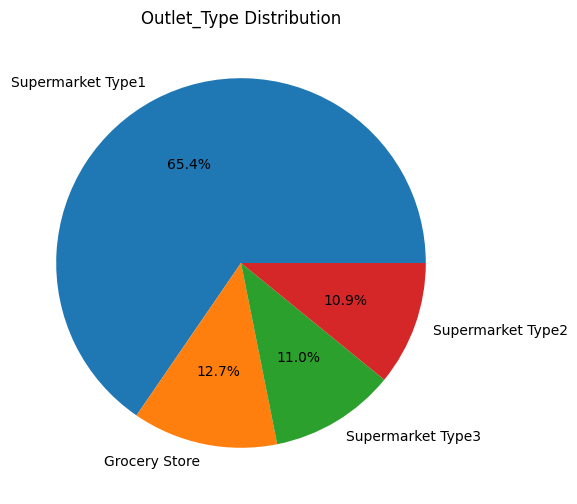

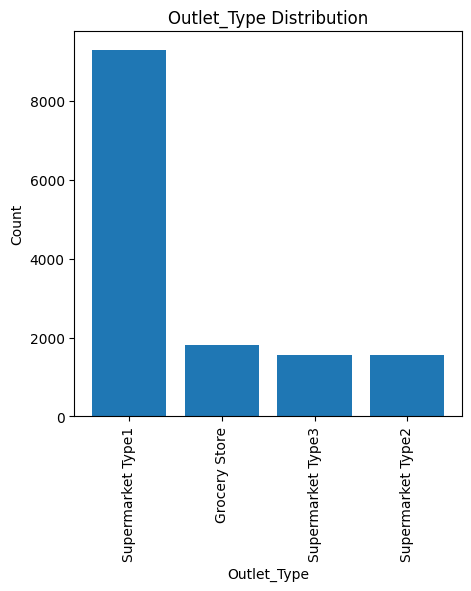

In [216]:
categoric_train= ["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

# iterate through each categorical attribute
for attr in categoric_train:
    # calculate value counts
    counts = new_data[attr].value_counts()
    
    # create pie chart
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(attr + ' Distribution')
    plt.show()
    
    # create barplot
    plt.figure(figsize=(5,5))
    plt.bar(counts.index, counts)
    plt.title(attr + ' Distribution')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Numerical Variable

The impact of  Item_Weight on Item_Outlet_Sales


C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3812035044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


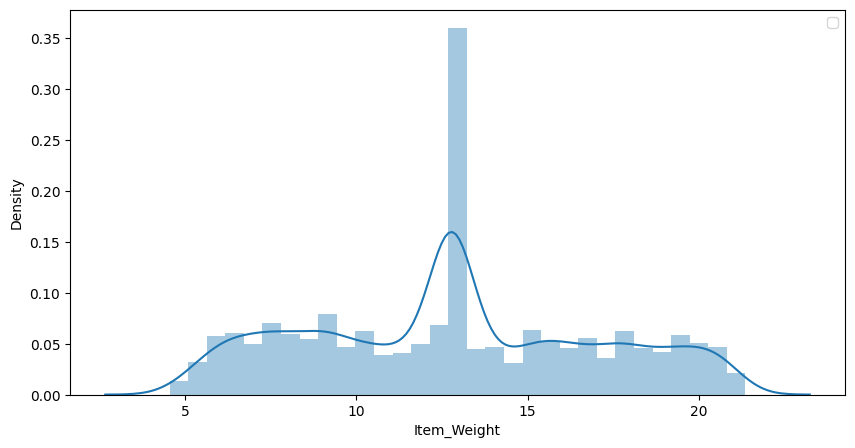

The impact of  Item_Visibility on Item_Outlet_Sales


C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3812035044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


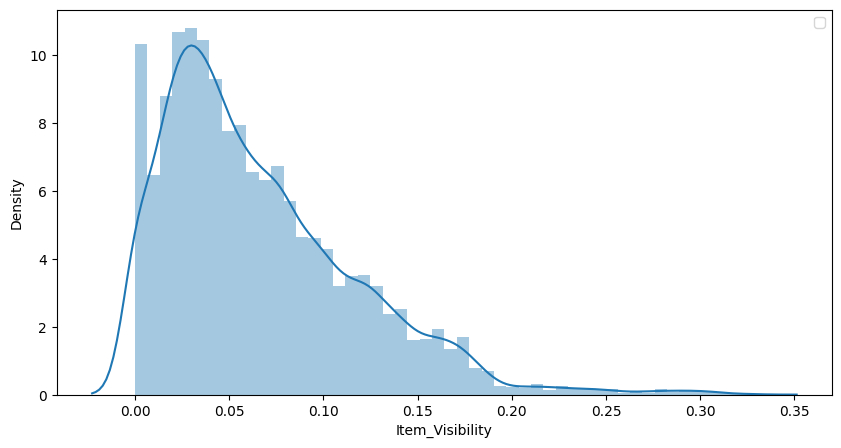

The impact of  Item_MRP on Item_Outlet_Sales


C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3812035044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


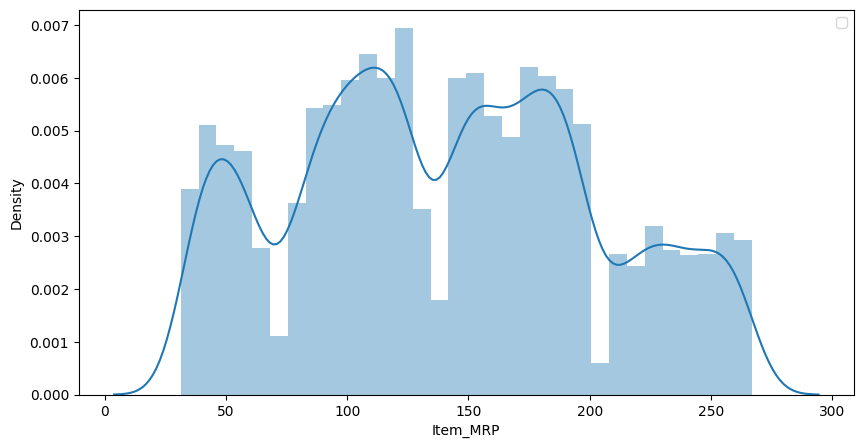

The impact of  Outlet_Establishment_Year on Item_Outlet_Sales


C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3812035044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


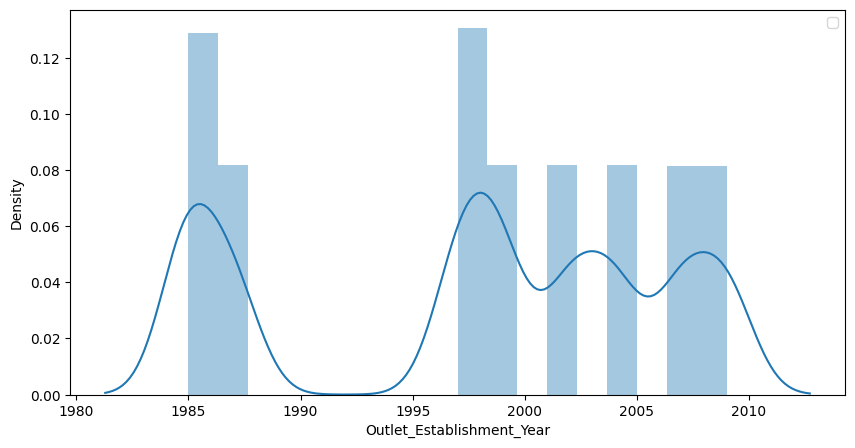

The impact of  Item_Outlet_Sales on Item_Outlet_Sales


C:\Users\DELL\AppData\Local\Temp\ipykernel_12312\3812035044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


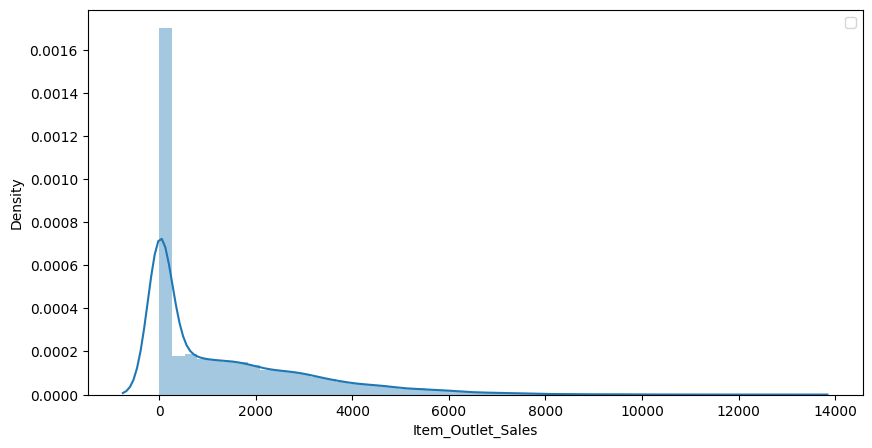

In [217]:
numerical_train=new_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
# Check the effect of all variable on the target varible:

for i in numerical_train:
    print('The impact of ', i, 'on Item_Outlet_Sales')
    plt.figure(figsize=(10,5))
    sns.distplot( data[i])
    plt.legend()
    plt.show()

# Bivariate Analysis

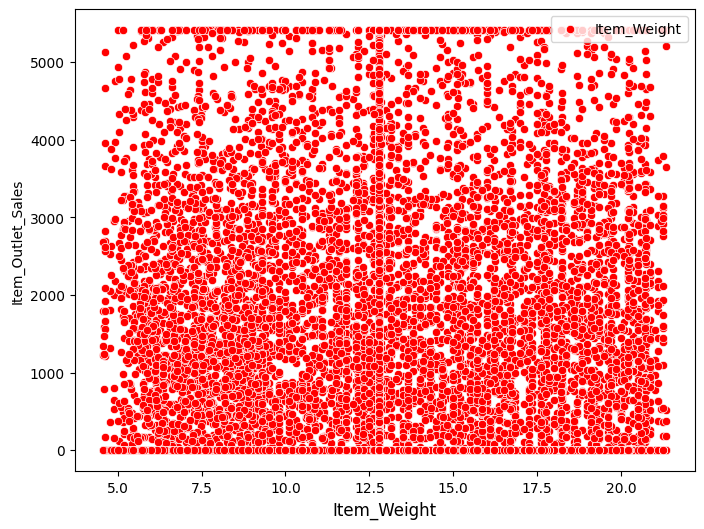

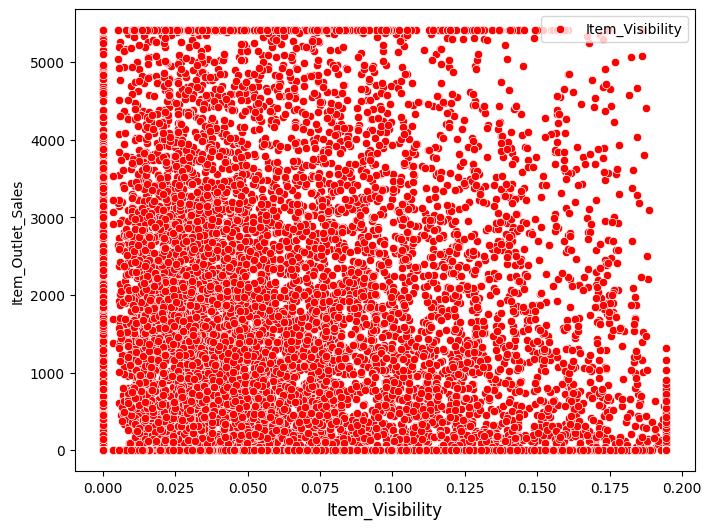

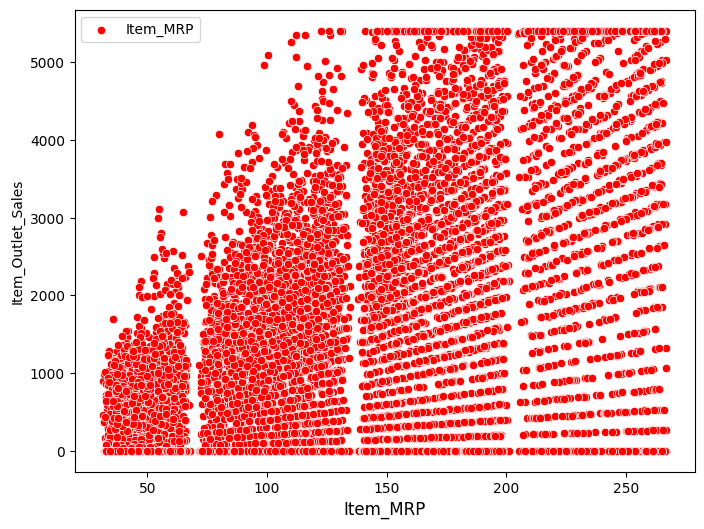

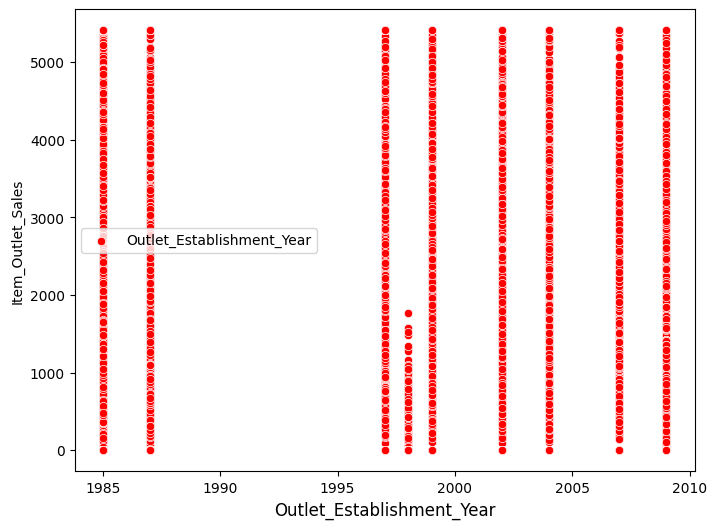

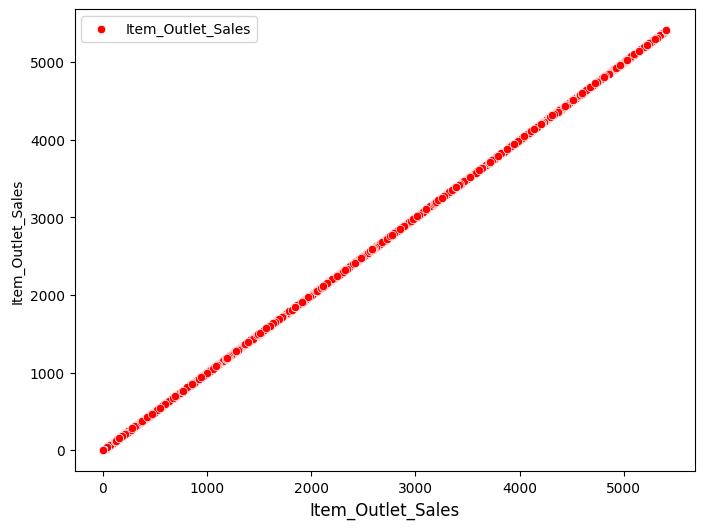

In [218]:
for i in numerical_train:
    plt.figure(figsize =(8,6))
    sns.scatterplot(x = i, y ='Item_Outlet_Sales', data = new_data,marker="o",sizes=200,color="r",label=i)
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Item_Outlet_Sales")

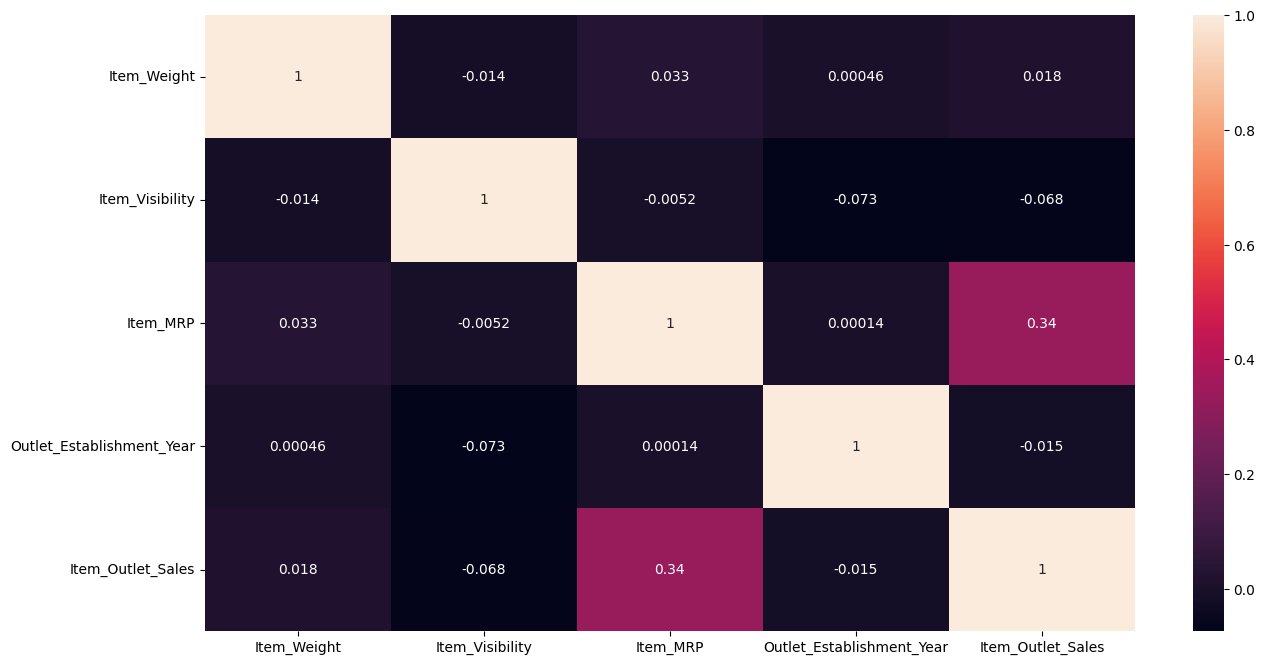

In [219]:
plt.figure(figsize=(15,8))

#Correlation plot
sns.heatmap(numerical_train.corr(), annot=True)
plt.show()

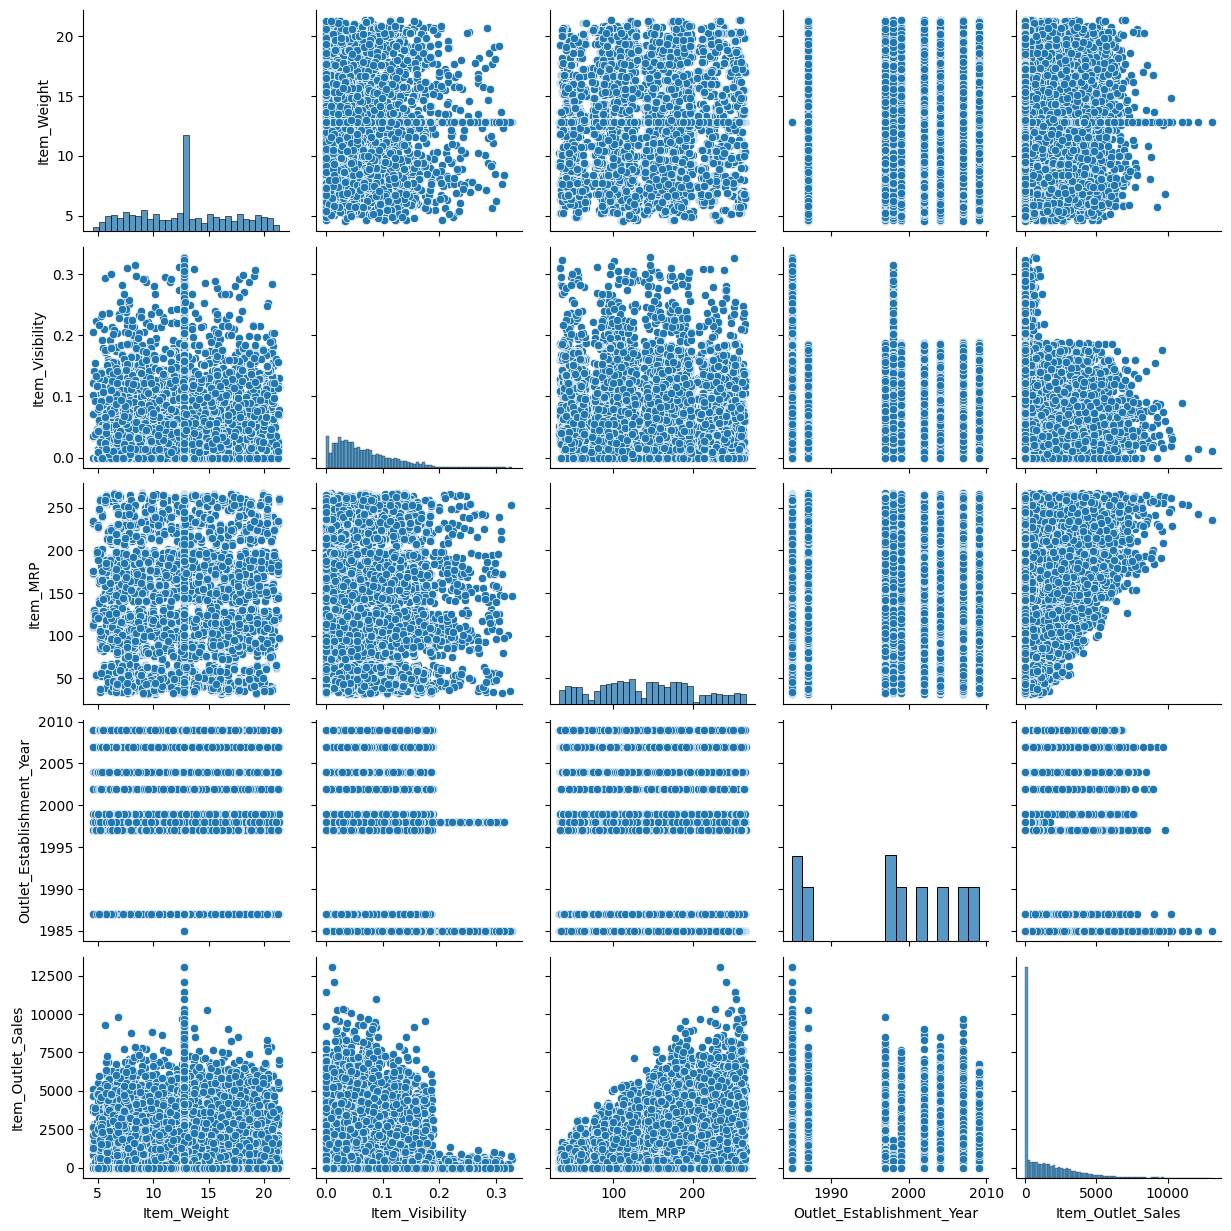

In [226]:
#pairplot for numerical variable
sns.pairplot(data)

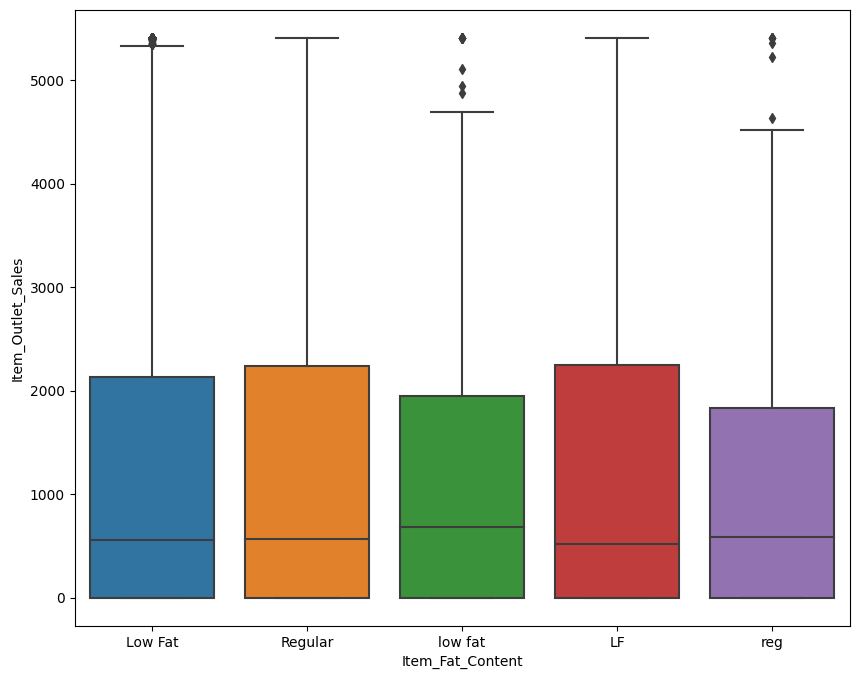

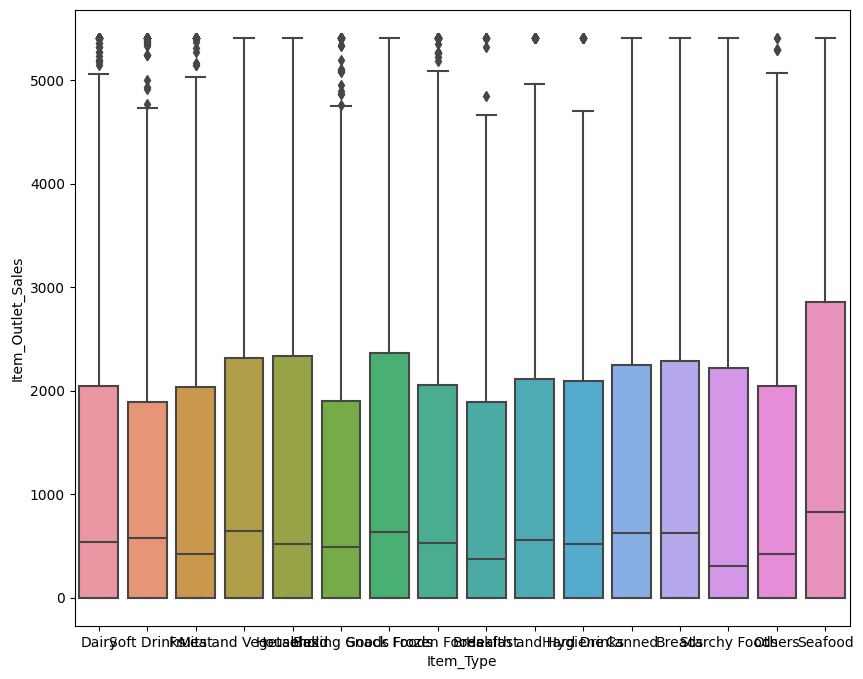

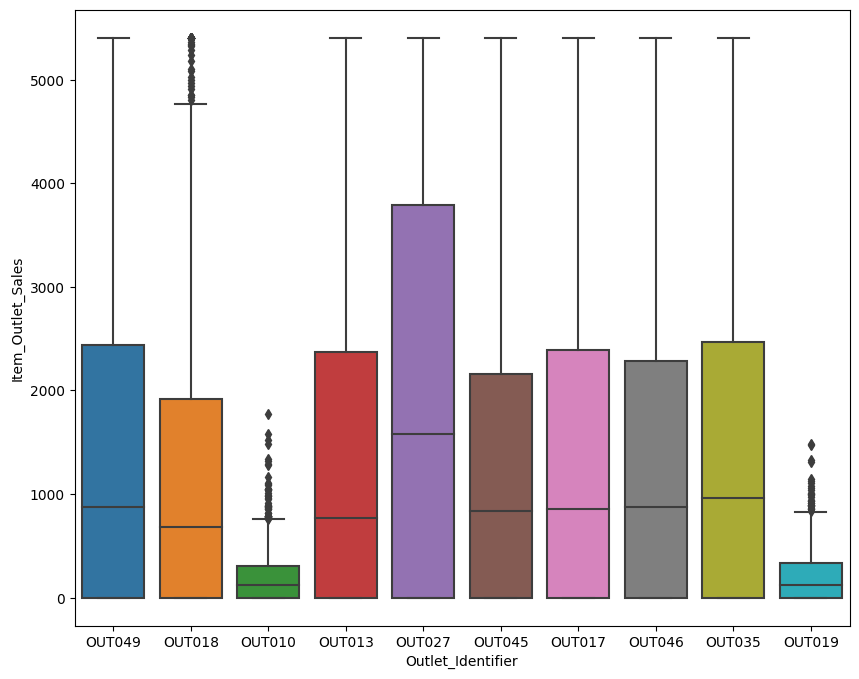

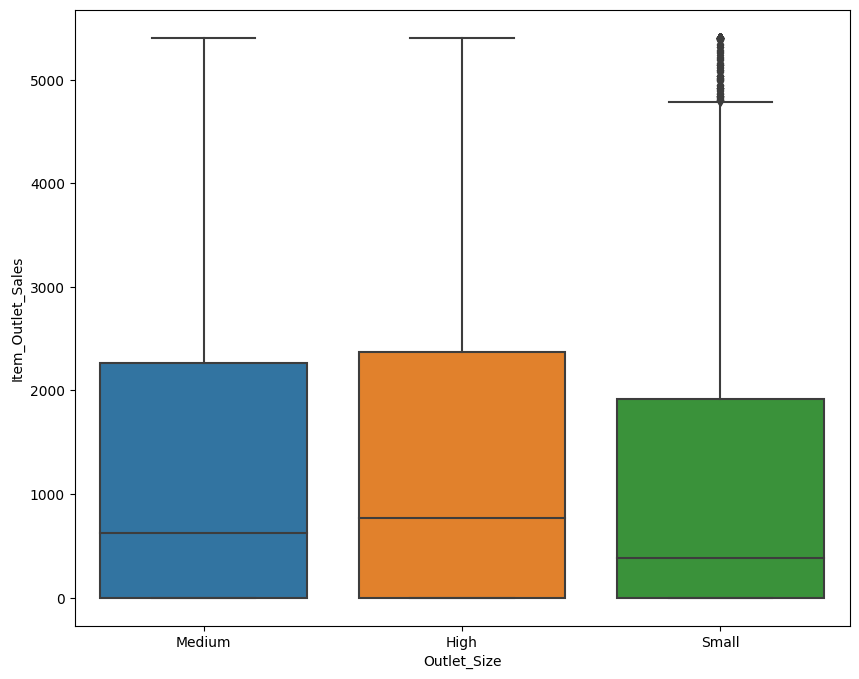

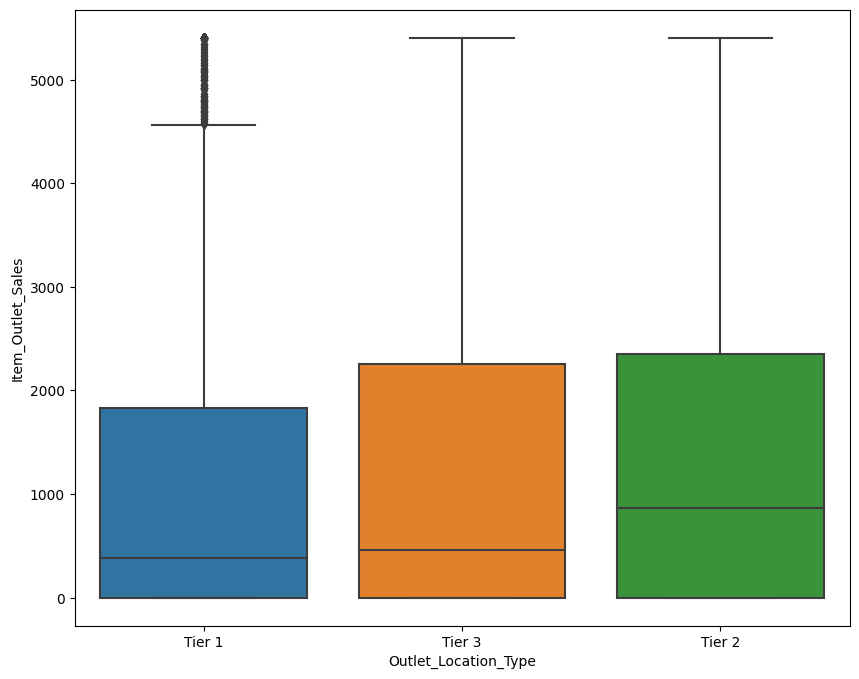

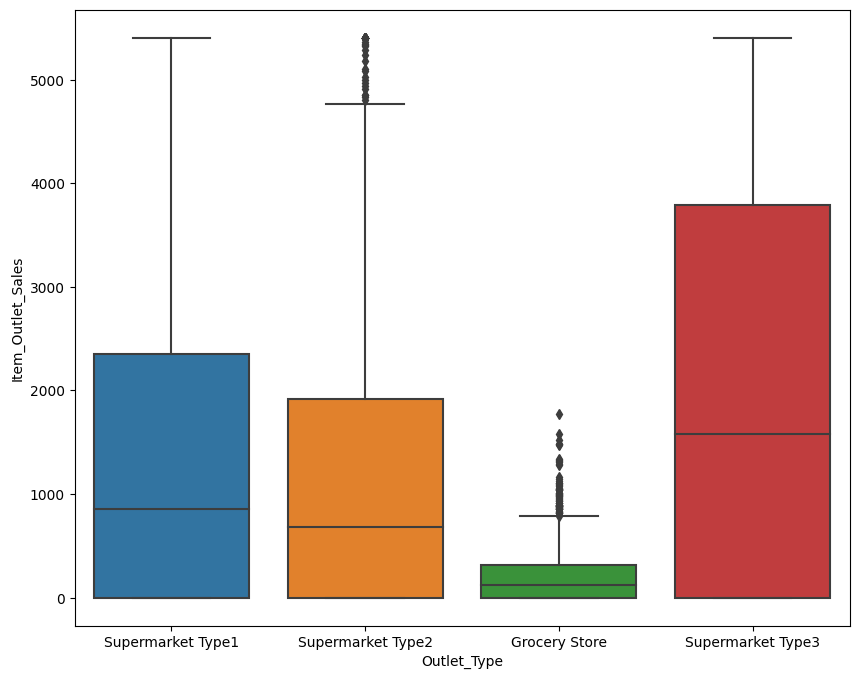

In [227]:
for i in categoric_train:
    plt.figure(figsize = (10,8))
    sns.boxplot( x = i, y = new_data['Item_Outlet_Sales'],data = new_data)
    #sns.boxplot( y = i, x = train3['Item_Outlet_Sales'],data = train3);